# Branded food data frame analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

In [2]:
filepath = lambda x: os.path.join('data', x)

In [3]:
branded_food = pd.read_csv(filepath('branded_food.csv'), dtype={
    'brand_owner':str,
    'brand_name':str,
    'subbrand_name':str,
    'gtin_upc':str})
branded_food.head()

C:\Users\Alexander\AppData\Local\Temp\ipykernel_5736\1118146348.py:1: DtypeWarning: Columns (6,9,12,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  branded_food = pd.read_csv(filepath('branded_food.csv'), dtype={


,fdc_id,brand_owner,brand_name,subbrand_name,gtin_upc,ingredients,not_a_significant_source_of,serving_size,serving_size_unit,household_serving_fulltext,branded_food_category,data_source,package_weight,modified_date,available_date,market_country,discontinued_date,preparation_state_code,trade_channel,short_description
0,1105904,Richardson Oilseed Products (US) Limited,NaN,NaN,00027000612323,Vegetable Oil,NaN,15.0,ml,NaN,Oils Edible,GDSN,NaN,2020-10-02,2020-11-13,United States,NaN,NaN,NaN,NaN
1,1105905,CAMPBELL SOUP COMPANY,NaN,NaN,00051000198808,"INGREDIENTS: BEEF STOCK, CONTAINS LESS THAN 2%...",NaN,240.0,ml,NaN,Herbs/Spices/Extracts,GDSN,NaN,2020-09-12,2020-11-13,United States,NaN,NaN,NaN,NaN
2,1105906,CAMPBELL SOUP COMPANY,NaN,NaN,00051000213273,"INGREDIENTS: CLAM STOCK, POTATOES, CLAMS, CREA...",NaN,440.0,g,NaN,Prepared Soups,GDSN,NaN,2020-09-01,2020-11-13,United States,NaN,NaN,NaN,NaN
3,1105907,CAMPBELL SOUP COMPANY,NaN,NaN,00051000213303,"INGREDIENTS: WATER, CREAM, BROCCOLI, CELERY, V...",NaN,440.0,g,NaN,Prepared Soups,GDSN,NaN,2020-09-01,2020-11-13,United States,NaN,NaN,NaN,NaN
4,1105908,CAMPBELL SOUP COMPANY,NaN,NaN,00051000224637,"INGREDIENTS: CHICKEN STOCK, CONTAINS LESS THAN...",NaN,240.0,ml,NaN,Herbs/Spices/Extracts,GDSN,NaN,2020-10-03,2020-11-13,United States,NaN,NaN,NaN,NaN


Going through the initial inspection of the dataset:

- Missingness/null values
- incorrect dtypes
- Reducing of columns/memory if possible]
- Validation of data (outlier searching and correction of incorrect values)

## Initial Missingness check

In [4]:
branded_food.isnull().mean()

fdc_id                         0.000000
brand_owner                    0.007813
brand_name                     0.296762
subbrand_name                  0.952827
gtin_upc                       0.000000
ingredients                    0.002923
not_a_significant_source_of    0.960171
serving_size                   0.005842
serving_size_unit              0.010312
household_serving_fulltext     0.585086
branded_food_category          0.005729
data_source                    0.000000
package_weight                 0.617388
modified_date                  0.000011
available_date                 0.000000
market_country                 0.000000
discontinued_date              1.000000
preparation_state_code         0.978783
trade_channel                  0.991557
short_description              0.978720
dtype: float64

We see that there are some columns with missing data, mainly towards the end, including discontinued_date, preparation_state_code, trade_channel, and short_description, which we will take a look through non-null examples and drop if necessary to preserve memory.

In [5]:
has_prep_code = branded_food[branded_food.preparation_state_code.notnull()]
has_prep_code.head()

,fdc_id,brand_owner,brand_name,subbrand_name,gtin_upc,ingredients,not_a_significant_source_of,serving_size,serving_size_unit,household_serving_fulltext,branded_food_category,data_source,package_weight,modified_date,available_date,market_country,discontinued_date,preparation_state_code,trade_channel,short_description
1549669,2219410,Cargill Incorporated/Honeysuckle White,HONEYSUCKLE WHITE,NaN,00642205546077,"Turkey, Natural Flavoring",NaN,112.0,g,4 oz.,Meat/Poultry/Other Animals Unprepared/Unproce...,GDSN,1 LBR,2019-03-07,2022-02-10,United States,NaN,UNPREPARED,NaN,HSW Fh 93% Grd Tky Chub 12/1
1549670,2219411,Cargill Incorporated/Honeysuckle White,Honeysuckle White,NaN,00642205534517,"All Natural White Turkey, Natural Flavoring",NaN,112.0,g,4 oz.,Meat/Poultry/Other Animals Unprepared/Unproce...,GDSN,1.25 LBR,2020-02-04,2022-02-10,United States,NaN,UNPREPARED,NaN,HSW Fh Gr WhtDry Ex Wt 6/1.25#
1549671,2219412,Cargill Incorporated/Honeysuckle White,HONEYSUCKLE WHITE,NaN,00642205534500,"All Natural Turkey, Natural Flavoing",NaN,112.0,g,4 oz.,Meat/Poultry/Other Animals Unprepared/Unproce...,GDSN,1.25 LBR,2020-02-05,2022-02-10,United States,NaN,UNPREPARED,NaN,HSW Fh 85/15 Gr tky Ex Wt 6/1.25
1549672,2219413,Kellogg Company US,Kellogg's Pop-Tarts,NaN,00038000317101,"Enriched flour (wheat flour, niacin, reduced i...",NaN,52.0,g,1 Pastry,Sweet Bakery Products,GDSN,14.7 ONZ,2019-04-09,2022-02-10,United States,NaN,UNPREPARED,NaN,Pop-Tarts
1549673,2219414,Kellogg Company US,Kellogg's Cheez It,NaN,00024100105236,"Enriched flour (wheat flour, niacin, reduced i...",NaN,25.0,g,1 Pouch,Biscuits/Cookies,GDSN,12.6 ONZ,2019-04-30,2022-02-10,United States,NaN,UNPREPARED,NaN,Gripz Crackers


In [6]:
has_prep_code.preparation_state_code.value_counts()

UNPREPARED        26631
PREPARED           5676
READY_TO_EAT       2830
READY_TO_DRINK     2677
BAKE                603
HEAT_AND_SERVE      272
THAW                147
FREEZE               97
GRILL                95
CONVECTION           36
UNSPECIFIED          22
FRY                  15
STEAM                12
DEEP_FRY             12
ROAST                11
BOIL                  7
MICROWAVE             4
STIR_FRY              4
Name: preparation_state_code, dtype: int64

We see that many of these are with respect to how to prepare the food for consumption, many of which are simply labeled "unprepared" or prepared. We also see that many of these preparation codes are disambiguous, as unprepared does contain also foods that would be considered ready to eat, such as Pop-Tarts or Cheez-its. Because of this, it may be hard to categorize food into explicitly "prepared" and "unprepared" categories. Therefore, we will not touch the column any further.

In [8]:
has_prep_code[has_prep_code.preparation_state_code == 'UNPREPARED'].head(5)

,fdc_id,brand_owner,brand_name,subbrand_name,gtin_upc,ingredients,not_a_significant_source_of,serving_size,serving_size_unit,household_serving_fulltext,branded_food_category,data_source,package_weight,modified_date,available_date,market_country,discontinued_date,preparation_state_code,trade_channel,short_description
1549669,2219410,Cargill Incorporated/Honeysuckle White,HONEYSUCKLE WHITE,NaN,00642205546077,"Turkey, Natural Flavoring",NaN,112.0,g,4 oz.,Meat/Poultry/Other Animals Unprepared/Unproce...,GDSN,1 LBR,2019-03-07,2022-02-10,United States,NaN,UNPREPARED,NaN,HSW Fh 93% Grd Tky Chub 12/1
1549670,2219411,Cargill Incorporated/Honeysuckle White,Honeysuckle White,NaN,00642205534517,"All Natural White Turkey, Natural Flavoring",NaN,112.0,g,4 oz.,Meat/Poultry/Other Animals Unprepared/Unproce...,GDSN,1.25 LBR,2020-02-04,2022-02-10,United States,NaN,UNPREPARED,NaN,HSW Fh Gr WhtDry Ex Wt 6/1.25#
1549671,2219412,Cargill Incorporated/Honeysuckle White,HONEYSUCKLE WHITE,NaN,00642205534500,"All Natural Turkey, Natural Flavoing",NaN,112.0,g,4 oz.,Meat/Poultry/Other Animals Unprepared/Unproce...,GDSN,1.25 LBR,2020-02-05,2022-02-10,United States,NaN,UNPREPARED,NaN,HSW Fh 85/15 Gr tky Ex Wt 6/1.25
1549672,2219413,Kellogg Company US,Kellogg's Pop-Tarts,NaN,00038000317101,"Enriched flour (wheat flour, niacin, reduced i...",NaN,52.0,g,1 Pastry,Sweet Bakery Products,GDSN,14.7 ONZ,2019-04-09,2022-02-10,United States,NaN,UNPREPARED,NaN,Pop-Tarts
1549673,2219414,Kellogg Company US,Kellogg's Cheez It,NaN,00024100105236,"Enriched flour (wheat flour, niacin, reduced i...",NaN,25.0,g,1 Pouch,Biscuits/Cookies,GDSN,12.6 ONZ,2019-04-30,2022-02-10,United States,NaN,UNPREPARED,NaN,Gripz Crackers


## Serving size cleaning

In [9]:
branded_food.serving_size_unit.value_counts()

g      1522350
ml      243399
GRM      40597
MLT       8288
MG        7555
IU        3671
GM         346
MC          63
Name: serving_size_unit, dtype: int64

We see that there are several options. We will look up what these units exactly mean (unabbreviated), and possibly merge any containing the same amount. We can also visualize the distributions of respective foods.

- g (gram)
- ml (mililiter, most likely for fluids)
- grm - unknown, will compare to gram's distribution for differences
- mlt - Unknwon
- MG - possibly a milligram distribution
- IU - 
- GM - possible alias for gram as well

In [10]:
inspect_unit = lambda x: branded_food[branded_food.serving_size_unit == x]

In [11]:
grm_foods = inspect_unit('GRM')
grm_foods

,fdc_id,brand_owner,brand_name,subbrand_name,gtin_upc,ingredients,not_a_significant_source_of,serving_size,serving_size_unit,household_serving_fulltext,branded_food_category,data_source,package_weight,modified_date,available_date,market_country,discontinued_date,preparation_state_code,trade_channel,short_description
1751470,2456687,SCHWAN'S FOOD SERVICE INC,TONY'S,NaN,10072180726718,"INGREDIENTS: FRENCH BREAD (WATER, WHITE WHOLE ...",NaN,156.0,GRM,1 Pizza (156g),Pies/Pastries/Pizzas/Quiches - Savoury (Frozen),GDSN,60 EA,2022-12-15,2023-01-26,United States,NaN,UNPREPARED,"[""CHILD_NUTRITION_FOOD_PROGRAMS""]",TN FB WG CHS 100
1751471,2456688,Bake Crafters Food Company,Bake Crafters,NaN,00737410335001,"Enriched Wheat Flour [Wheat Flour, Malted Barl...",NaN,28.0,GRM,1 oz (28g),Bread (Frozen),GDSN,6.25 LBR,2022-06-02,2023-01-26,United States,NaN,UNPREPARED,NaN,"Pullman Bread, White, 1 Slice, IW"
1751472,2456689,Bake Crafters Food Company,Bake Crafters,NaN,00737410171708,"Whole Wheat Flour, Enriched Bleached Wheat Flo...",NaN,78.0,GRM,"2.75 oz (78g), 4 pieces",Desserts (Frozen),GDSN,12.375 LBR,2022-06-02,2023-01-26,United States,NaN,UNPREPARED,"[""CHILD_NUTRITION_FOOD_PROGRAMS"",""CHILD_NUTRIT...","Mini Breakfast Bites, Glz, WG, 4 Pk"
1751473,2456690,Bake Crafters Food Company,Bake Crafters,NaN,00737410158105,"Water, Whole Wheat Flour, Enriched Wheat Flour...",NaN,40.0,GRM,"1.4 oz (40g), 2 Pancakes",Bread (Frozen),GDSN,14.175 LBR,2022-06-02,2023-01-26,United States,NaN,UNPREPARED,"[""CHILD_NUTRITION_FOOD_PROGRAMS"",""CHILD_NUTRIT...",Pancakes WG Wholesome Choice Mpl Ch
1751474,2456691,Brakebush Brothers,Brakebush,NaN,10038034558706,UNCOOKED BONELESS CHICKEN BREAST TENDERS CONTA...,NaN,71.0,GRM,1 Piece,Chicken - Prepared/Processed,GDSN,10 LBR,2022-04-26,2023-01-26,United States,NaN,UNPREPARED,NaN,Crispy-Lishus tenders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1845290,2554908,Tanjoe Enterprises Inc.,LIDIA'S,NaN,897712001049,"ITALIAN TOMATOES (CITRIC ACID), ARTICHOKES, CA...",NaN,125.0,GRM,1/2 cup,Prepared Pasta & Pizza Sauces,LI,25 oz/708 g,2023-03-27,2023-05-25,United States,NaN,NaN,NaN,NaN
1845291,2554909,Oregon Growers & Shippers LLC,OREGON GROWERS,NaN,898271000948,"BLACKBERRIES (MARIONBERRIES, BLACKBERRIES), CA...","Not a significant source of saturated fat, tra...",39.0,GRM,2 Tbsp,Syrups & Molasses,LI,8 fl oz/237 mL,2023-04-26,2023-05-25,United States,NaN,NaN,NaN,NaN
1845292,2554910,Mt. Garfield Winery Corp,LIFESTYLEFOODS,NaN,898425002682,ARCADIAN HARVEST LETTUCE (BLEND OF LEAF LETTUC...,NaN,163.0,GRM,NaN,"Pickles, Olives, Peppers & Relishes",LI,5.75 oz./163 g,2023-03-10,2023-05-25,United States,NaN,NaN,NaN,NaN
1845295,2554913,"Ittella International, Inc.",TATTOOED CHEF,NaN,899764001527,"CAULIFLOWER, CORN FLOUR, GRANA PADANO CHEESE (...",NaN,71.0,GRM,1 pc,Frozen Patties and Burgers,LI,10 oz/283 g,2023-03-23,2023-05-25,United States,NaN,NaN,NaN,NaN


One thing to note is the serving size amount of grm corresponding to the household serving fulltext. We can see many examples where the gram amount corresponds to what is labeled in household serving fulltext:

In [12]:
(
    grm_foods[grm_foods.household_serving_fulltext.str.contains('g)', regex=False).fillna(False)]
    [['serving_size', 'serving_size_unit', 'household_serving_fulltext']]
)

,serving_size,serving_size_unit,household_serving_fulltext
1751470,156.0,GRM,1 Pizza (156g)
1751471,28.0,GRM,1 oz (28g)
1751472,78.0,GRM,"2.75 oz (78g), 4 pieces"
1751473,40.0,GRM,"1.4 oz (40g), 2 Pancakes"
1751477,34.0,GRM,"1.19 oz (34g), 1 Bread Stick"
...,...,...,...
1841730,4.0,GRM,2 Tbsp (4g)
1841731,79.0,GRM,"2.8 oz (79g), 1 Biscuit"
1842987,61.0,GRM,2/3 cup dry mix (61g) (1cup prepared)
1842989,61.0,GRM,1 link (g)


From this we can most likely consider **grm** as synonymous with the **g** abbreviation. 

In [13]:
g_foods = inspect_unit('g')
g_foods[g_foods.household_serving_fulltext.str.contains('g)', regex=False).fillna(False)][['serving_size', 'serving_size_unit', 'household_serving_fulltext']]

,serving_size,serving_size_unit,household_serving_fulltext
34110,17.0,g,1 Tbsp (17g)
34285,17.0,g,1 Tbsp(17g)
34382,62.0,g,1/4 cup (62g)
34383,62.0,g,1/4 cup (62g)
34384,62.0,g,1/4 cup (62g)
...,...,...,...
1757337,54.0,g,3 sheets (3x18g) dry
1759907,85.0,g,1 cup salad only/ 1 cup dressed salad with top...
1760115,85.0,g,1 cup salad only/1 cup dressed salad with topp...
1776928,85.0,g,"1 Cup Vegetables (85 g), 4 pieces Sausage (16 ..."


If we only look at these examples, we would consider them as conventionally the same. However, they may not be the same exactly. One way we can possibly further reinforce this idea is through a permutation test; if we assume that they're from the same distribution, then the two distributions should be similar to each other.

## Gram permutation test

Because the amount of foods there are between the two, we will instead choose to sample the distributions to about 10,000 for each distribution. We will also eliminate some of the outliers, as we noticed from the descriptive statistics (mainly the max) of g foods.

In [14]:
g_stats = g_foods.serving_size.describe()
g_stats

count    1.522350e+06
mean     4.005529e+02
std      2.935550e+05
min      0.000000e+00
25%      2.800000e+01
50%      4.000000e+01
75%      8.500000e+01
max      2.561132e+08
Name: serving_size, dtype: float64

In [15]:
def remove_outlier(data, column):
    # Returns a dataset without outlier rows in given column. Outliers are determined via IQR range.
    data_stats = data[column].describe()
    data_iqr = data_stats['75%'] - data_stats['25%']
    data_lb = data_stats['25%'] - data_iqr * 1.5
    data_ub = data_stats['75%'] + data_iqr * 1.5
    
    new_data = data[(data[column] >= data_lb) & (data[column] <= data_ub)]
    return new_data

From many of the graphs, we can see that serving sizes above 600 are about rare. However, we can also possibly square root the graph to make it less receptive to outliers. A log transformation may not be possible as well, as some of the entries are 0, making log impossible. We will simply turn to the Box Plot method of removing outliers, where we consider anything above the 75% point (Q3) + 1.5 * (Q3 - Q1) to be an outlier, as well as anything below (Q1) - 1.5 * (Q3 - Q1).

In [16]:
g_foods_no_outlier = remove_outlier(g_foods, 'serving_size')
g_foods_no_outlier.shape

(1452772, 20)

In [17]:
(g_foods.shape[0] - g_foods_no_outlier.shape[0]) / g_foods.shape[0] # Amount of rows dropped

0.04570433868689854

We repeat the process with grm foods:

In [18]:
grm_stats = grm_foods.serving_size.describe()
grm_stats

count    40597.000000
mean        64.826811
std         83.239828
min          0.060000
25%         28.000000
50%         36.000000
75%         88.000000
max       9979.000000
Name: serving_size, dtype: float64

One thing to point out is that the quantile statistics (25%, 50%, 75%) are similar between g and grm.

In [19]:
grm_foods_no_outlier = remove_outlier(grm_foods, 'serving_size')
(grm_foods.shape[0] - grm_foods_no_outlier.shape[0]) / grm_foods.shape[0] # Also removed about 5% of the data

0.05197428381407493

We will run permutation by both median and mean.

## Gram permutation test

H0: The samples of grm and g come from the same distribution.

H1: The samples of grm and g come from different distributions.

alpha = .05

In [20]:
branded_food.shape[0]

1845297

In [51]:
def test_stat(data, category, val_column, apply_func):
    return np.abs(data.groupby(category)[val_column].agg(apply_func).diff().iloc[-1])

def perm_test(apply_func, dist1, dist2, sample_size, category, val_column):
    """ Compute an (approximate) permutation test between two distributions using either median or mean. 
        Returns the p-value corresponding to the likelihood that the distributions are the same broader distribution. """
    sample_reps = 1000
    # Sample stat
    obs_stat = test_stat(pd.concat([dist1, dist2]), category, val_column, apply_func)
    
    samples = np.zeros(sample_reps)
    
    # Create a dataset sampling both distributions (or using whole dataset if wanted)
    if sample_size <= 0:
        # Sample entire data set
        sample = pd.concat([dist1, dist2])
    else:
        sample = pd.concat([dist1.sample(sample_size, replace=False), dist2.sample(sample_size, replace=False)])
        
    # Create different permutations of the distributions
    for i in range(sample_reps):

        # Shuffle around the label, and aggregate with apply function
        sample[category] = sample[category].sample(sample.shape[0], replace=False)
        sample_stat = test_stat(sample, category, val_column, apply_func)
    
        # Add to samples
        samples[i] = sample_stat
        
    return obs_stat, np.mean(samples >= obs_stat)

def dist_plot(data, value, category):
    """Returns a kde plot of the data's values separated by category."""
    
    return sns.kdeplot(
        data=data,
        x=value,
        hue=category,
        common_norm=False)
    

In [24]:
perm_test('median', g_foods, grm_foods, 10000, 'serving_size_unit', 'serving_size')

(4.0, 1.0)

<AxesSubplot:xlabel='serving_size', ylabel='Density'>

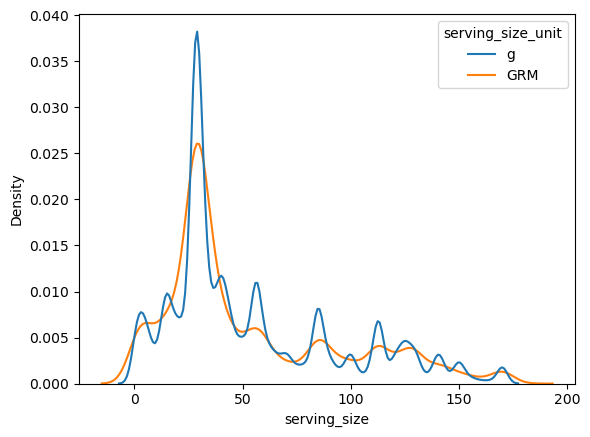

In [52]:
dist_plot(pd.concat([g_foods_no_outlier, grm_foods_no_outlier]), 'serving_size', 'serving_size_unit')

We receive p-values towards about .5-.6 which exceeds our alpha level from our permutation test. Overall, we are more inclined towards the null hypothesis being true (grm is the same as g), and will convert grm entries to g (grams). One thing to point out is also the overall skew in our data, so we will use median as our test statistic instead of mean, which would have more extreme values given the skew in our distributions.

In [41]:
branded_food['serving_size_unit'] = branded_food['serving_size_unit'].replace('GRM', 'g')

## Other suspected gram labels

We also suspect that mg and gm may be related to gram in some matter.

In [42]:
branded_food.serving_size_unit.value_counts()

g      1562947
ml      243399
MLT       8288
MG        7555
IU        3671
GM         346
MC          63
Name: serving_size_unit, dtype: int64

In [50]:
mg_foods = inspect_unit('MG')
mg_foods[mg_foods.household_serving_fulltext.str.contains('g').fillna(False)].head()

,fdc_id,brand_owner,brand_name,subbrand_name,gtin_upc,ingredients,not_a_significant_source_of,serving_size,serving_size_unit,household_serving_fulltext,branded_food_category,data_source,package_weight,modified_date,available_date,market_country,discontinued_date,preparation_state_code,trade_channel,short_description
1789245,2494462,"Parks, LLC",PARKS FAMOUS FLAVOR,NaN,012400124118,"BEEF, WATER, BEEF HEARTS, NONFAT DRY MILK, SAL...","Not a significant source of Dietary Fiber,Vita...",85.0,MG,1 Sausage,"Sausages, Hotdogs & Brats",LI,48 oz/3 lbs,2023-02-22,2023-03-16,United States,NaN,NaN,NaN,NaN
1789246,2494463,"Parks, LLC",PARKS FAMOUS FLAVOR,NaN,012400124415,"BEEF, WATER, BEEF HEARTS, NONFAT DRY MILK, SAL...","Not a significant source of Dietary Fiber,Vita...",85.0,MG,1 Sausage,"Sausages, Hotdogs & Brats",LI,48 oz/3 lbs,2023-02-22,2023-03-16,United States,NaN,NaN,NaN,NaN
1789247,2494464,"Parks, LLC",PARKS FAMOUS FLAVOR,NaN,012400822120,"TURKEY, MECHANICALLY SEPARATED TURKEY, WATER, ...","Not a significant source of dietary fiber,Vita...",90.0,MG,1 Sausage,"Sausages, Hotdogs & Brats",LI,48 oz/3 lbs,2023-02-22,2023-03-16,United States,NaN,NaN,NaN,NaN
1790174,2495391,"Rouse's Enterprises, Inc.",ROUSES MARKETS,NaN,015418016451,"CHICKEN BREAST, SEASONING (ENCAPSULATED VINEGA...",NaN,170.0,MG,170 g,"Poultry, Chicken & Turkey",LI,24 oz/1.5 lbs/680 g,2023-01-28,2023-03-16,United States,NaN,NaN,NaN,NaN
1790252,2495469,"General Mills, Inc.",CINNAMON TOAST CRUNCH,NaN,016000168541,"WHOLE GRAIN OATS, CORN SYRUP, SUGAR, WHOLE WHE...",Not a significant source ofVitamin D.,70.0,MG,70 g,"Snack, Energy & Granola Bars",LI,2 oz,2023-02-01,2023-03-16,United States,NaN,NaN,NaN,NaN


We also see that the mg column may be possibly connected to grams, as shown by some samples where milligrams doesn't exactly make sense (chicken breast, sausages, etc), and the household serving text also using "g" to denote some. However, these may also simply be typos, so it may not exactly be correct to convert the unit to grams. We will simply use a permutation test with the median to compare distributions this time so we don't have to filter out outliers. We use the same hypothesis setup still:

H0: The samples of g and mg come from the same distribution.

H1: The samples of g and mg come from different distributions.

alpha = .05

In [57]:
perm_test('median', g_foods, mg_foods, 5000, 'serving_size_unit', 'serving_size')

(7.0, 1.0)

We are inclined towards the belief that mg and g both come from the same distribution, so we shall also replace mg with g.

In [60]:
branded_food['serving_size_unit'] = branded_food.serving_size_unit.replace('MG', 'g')

In [61]:
branded_food.serving_size_unit.value_counts()

g      1570502
ml      243399
MLT       8288
IU        3671
GM         346
MC          63
Name: serving_size_unit, dtype: int64

In [62]:
gm_foods = inspect_unit('GM')
gm_foods.head()

,fdc_id,brand_owner,brand_name,subbrand_name,gtin_upc,ingredients,not_a_significant_source_of,serving_size,serving_size_unit,household_serving_fulltext,branded_food_category,data_source,package_weight,modified_date,available_date,market_country,discontinued_date,preparation_state_code,trade_channel,short_description
1788278,2493495,Rite Aid Corporation,BIG WIN,NaN,011822399470,"FILTERED WATER, APPLE JUICE CONCENTRATE, ASCOR...","Not a significant source of saturated fat, tra...",240.0,GM,8 fl oz,"Fruit & Vegetable Juice, Nectars & Fruit Drinks",LI,16 fl oz/1 PT/473 mL,2023-02-13,2023-03-16,United States,NaN,NaN,NaN,NaN
1788293,2493510,Rite Aid Corporation,BIG WIN,NaN,011822446921,"BEEF, SUGAR, WATER, SEA SALT, GARLIC POWDER, Y...",NaN,28.0,GM,1 oz,Other Snacks,LI,6 oz/170 g,2023-02-13,2023-03-16,United States,NaN,NaN,NaN,NaN
1788601,2493818,Pepsi-Cola North America Inc.,DOLE,NaN,012000064524,"WATER, SUGAR, CITRIC ACID, LEMON JUICE CONCENT...",Not a significant source of other nutrients.,240.0,GM,8 fl oz,Soda,LI,2 L/2.1 Quart,2023-01-06,2023-03-16,United States,NaN,NaN,NaN,NaN
1788609,2493826,Pepsi-Cola North America Inc.,MTN DEW,NaN,012000100468,"CARBONATED WATER, HIGH FRUCTOSE CORN SYRUP, CO...",Not a significant source of other nutrients.,360.0,GM,12 fl oz,Soda,LI,144 fl oz/4.26 L,2023-01-05,2023-03-16,United States,NaN,NaN,NaN,NaN
1789203,2494420,Pepsi-Cola North America Inc.,MTN DEW,NaN,012000809989,"CARBONATED WATER, HIGH FRUCTOSE CORN SYRUP, CO...",Not a significant source of other nutrients.,360.0,GM,12 fl,Soda,LI,144 fl oz/4.26 L,2023-01-05,2023-03-16,United States,NaN,NaN,NaN,NaN


In [65]:
gm_foods.shape

(346, 20)

Inspecting GM through the head function indicates that the unit may correspond to water/fluid based products, and most likely does not correspond to grams. We can also do a permutation test, and we expect it to fail. One thing to point out is the small sample size relative to previous permutation tests.

In [66]:
perm_test('median', gm_foods, g_foods, 250, 'serving_size_unit', 'serving_size')

(10.0, 0.0)

In [67]:
gm_foods.serving_size.describe()

count    346.000000
mean      80.627650
std      106.346099
min        0.204000
25%       22.000000
50%       30.000000
75%       99.750000
max      600.000000
Name: serving_size, dtype: float64

<AxesSubplot:xlabel='serving_size', ylabel='Density'>

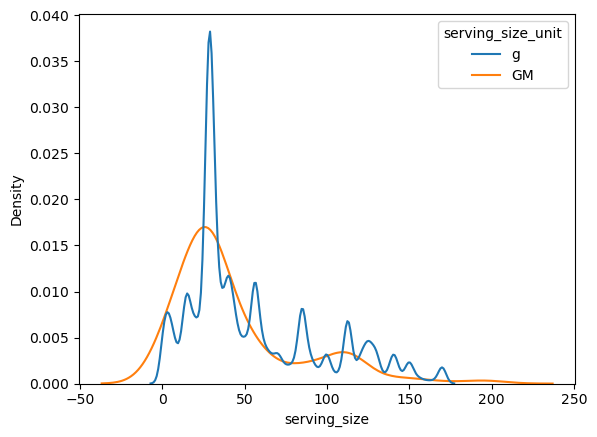

In [72]:
dist_plot(pd.concat([g_foods_no_outlier, remove_outlier(gm_foods, 'serving_size')]), 'serving_size', 'serving_size_unit')

We see that we reject the null hypothesis in favor of the alternative, so we are inclined towards the idea that gm is not from the same distribution as g. 

## ML vs MLT permutation test check

We finally inspect ml vs MLT, which we suspect is the same unit as well.

In [73]:
mlt_foods = inspect_unit('MLT')
mlt_foods.head()

,fdc_id,brand_owner,brand_name,subbrand_name,gtin_upc,ingredients,not_a_significant_source_of,serving_size,serving_size_unit,household_serving_fulltext,branded_food_category,data_source,package_weight,modified_date,available_date,market_country,discontinued_date,preparation_state_code,trade_channel,short_description
1751954,2457171,National Food Group Inc.,Zee Zees,NaN,00185043000436,"Peaches, Pears, Grapes, Water, White Grape Jui...",NaN,135.0,MLT,4.5 oz cup,Fruit - Prepared/Processed (Shelf Stable),GDSN,72 EA,2022-08-04,2023-01-26,United States,NaN,READY_TO_EAT,"[""CHILD_NUTRITION_FOOD_PROGRAMS""]",Diced Mixed Fruit Cup
1752206,2457423,PepsiCo Inc. Brand Owner,Propel,NaN,00052000042702,"WATER, CITRIC ACID, SODIUM HEXAMETAPHOSPHATE (...",NaN,507.0,MLT,16.9 fl oz (500 mL) Per Serving,Packaged Water,GDSN,16.9 OZA,2022-12-22,2023-01-26,United States,NaN,UNPREPARED,"[""GROCERY""]",Propel Zero Sgr Elctrlyts Mgo16.9Oz
1752404,2457621,CAMPBELL SOUP COMPANY,CAMPBELL'S,SLOW KETTLE,00051000234056,"INGREDIENTS: WATER, TOMATO PUREE (WATER, TOMAT...",NaN,237.0,MLT,PER 1 CUP,Soups - Prepared (Shelf Stable),GDSN,15.5 ONZ,2022-12-31,2023-01-26,United States,NaN,UNPREPARED,"[""GROCERY""]",CPB SK RED PEP & SMKD GDA
1752446,2457663,CAMPBELL SOUP COMPANY,CAMPBELL'S,CHUNKY,00051000231772,"INGREDIENTS: CHICKEN STOCK, CREAM, CARROTS, CH...",NaN,240.0,MLT,PER SERVING,Soups - Prepared (Shelf Stable),GDSN,18.8 ONZ,2022-12-31,2023-01-26,United States,NaN,UNPREPARED,"[""GROCERY""]",CKY CRMY CKN NDL
1752459,2457676,CAMPBELL SOUP COMPANY,PREGO,NaN,00051000222121,"INGREDIENTS: WATER, CREAM (MILK), BUTTER (CREA...",NaN,60.0,MLT,Amount/Serving,Sauces - Cooking (Shelf Stable),GDSN,22 ONZ,2022-12-31,2023-01-26,United States,NaN,UNPREPARED,"[""GROCERY""]",PRG ALFR SCE


In [74]:
ml_foods = inspect_unit('ml')
ml_foods.head()

,fdc_id,brand_owner,brand_name,subbrand_name,gtin_upc,ingredients,not_a_significant_source_of,serving_size,serving_size_unit,household_serving_fulltext,branded_food_category,data_source,package_weight,modified_date,available_date,market_country,discontinued_date,preparation_state_code,trade_channel,short_description
0,1105904,Richardson Oilseed Products (US) Limited,NaN,NaN,00027000612323,Vegetable Oil,NaN,15.0,ml,NaN,Oils Edible,GDSN,NaN,2020-10-02,2020-11-13,United States,NaN,NaN,NaN,NaN
1,1105905,CAMPBELL SOUP COMPANY,NaN,NaN,00051000198808,"INGREDIENTS: BEEF STOCK, CONTAINS LESS THAN 2%...",NaN,240.0,ml,NaN,Herbs/Spices/Extracts,GDSN,NaN,2020-09-12,2020-11-13,United States,NaN,NaN,NaN,NaN
4,1105908,CAMPBELL SOUP COMPANY,NaN,NaN,00051000224637,"INGREDIENTS: CHICKEN STOCK, CONTAINS LESS THAN...",NaN,240.0,ml,NaN,Herbs/Spices/Extracts,GDSN,NaN,2020-10-03,2020-11-13,United States,NaN,NaN,NaN,NaN
7,1105911,CAMPBELL SOUP COMPANY,NaN,NaN,00051000227478,"INGREDIENTS: DICED TOMATOES IN TOMATO JUICE, T...",NaN,120.0,ml,NaN,Sauces/Spreads/Dips/Condiments,GDSN,NaN,2020-09-01,2020-11-13,United States,NaN,NaN,NaN,NaN
8,1105912,CAMPBELL SOUP COMPANY,NaN,NaN,00051000058874,"INGREDIENTS: TOMATO PUREE (WATER, TOMATO PASTE...",NaN,120.0,ml,NaN,Prepared Soups,GDSN,NaN,2020-09-01,2020-11-13,United States,NaN,NaN,NaN,NaN


In [75]:
perm_test('median', ml_foods, mlt_foods, 5000, 'serving_size_unit', 'serving_size')

(0.0, 1.0)

In [45]:
ml_foods.serving_size.describe()

count    243399.000000
mean        217.184093
std         144.704935
min           0.000000
25%          60.000000
50%         240.000000
75%         330.000000
max        3750.000000
Name: serving_size, dtype: float64

In [46]:
mlt_foods.serving_size.describe()

count     8288.000000
mean       257.533073
std        208.852684
min          0.130000
25%        120.000000
50%        240.000000
75%        360.000000
max      10800.000000
Name: serving_size, dtype: float64

In [77]:
ml_foods_no_outlier = remove_outlier(ml_foods, 'serving_size')
mlt_foods_no_outlier = remove_outlier(mlt_foods, 'serving_size')
perm_test('median', ml_foods_no_outlier, mlt_foods_no_outlier, 5000, 'serving_size_unit', 'serving_size')

(0.0, 1.0)

In [ ]:
dist_plot(pd.concat([ml_foods_no_outlier, mlt_foods_no_outlier]), 'serving_size', 'serving_size_unit')

We find by test that the distributions are more likely to be from the same underlying distribution.

In [48]:
branded_food['serving_size_unit'] = branded_food.serving_size_unit.replace('MLT', 'ml')

In [49]:
iu_foods = inspect_unit('IU')
iu_foods[iu_foods.household_serving_fulltext.notnull()]

,fdc_id,brand_owner,brand_name,subbrand_name,gtin_upc,ingredients,not_a_significant_source_of,serving_size,serving_size_unit,household_serving_fulltext,branded_food_category,data_source,package_weight,modified_date,available_date,market_country,discontinued_date,preparation_state_code,trade_channel,short_description
1787940,2493157,Acetificio Marcello Denigris,DE NIGRIS,NaN,008295664853,"COOKED GRAPE MUST, WINE VINEGAR",NaN,15.0,IU,1 tbs,Other Condiments,LI,8.5 FL OZ/250 mL,2022-11-02,2023-03-16,United States,NaN,NaN,NaN,NaN
1787960,2493177,"Cosmania, Inc.",APPLETON'S MARKET,NaN,008600030038,"VEGETABLE BLEND (CARROTS, BROCCOLI, KALE, SWIS...",NaN,63.0,IU,63 g,"Chips, Pretzels & Snacks",LI,2.2 oz/63 g,2023-01-20,2023-03-16,United States,NaN,NaN,NaN,NaN
1787961,2493178,Long Grove Confectionery Co.,LONG GROVE,NaN,008725030159,"WHITE CHOCOLATE (SUGAR, WHOLE MILK POWDER, COC...",NaN,50.0,IU,1 pc.,Chocolate,LI,1.75 OZ/50 g,2023-01-20,2023-03-16,United States,NaN,NaN,NaN,NaN
1787962,2493179,Long Grove Confectionery Co.,NaN,NaN,008725030166,"DARK CHOCOLATE (SUGAR, CHOCOLATE LIQUOR, COCOA...",NaN,57.0,IU,1 pc.,Chocolate,LI,57 g/2 OZ,2022-12-23,2023-03-16,United States,NaN,NaN,NaN,NaN
1787965,2493182,Long Grove Confectionery Co.,NaN,NaN,008725220079,"DARK CHOCOLATE (SUGAR, CHOCOLATE LIQUOR, COCOA...",NaN,33.0,IU,1/3 pc,Candy,LI,3.5 OZ/99 g,2023-02-21,2023-03-16,United States,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829829,2539447,"Lehi Valley Trading Company, Inc.",NOT A BRANDED ITEM,SNACK WORTHY,879114007607,"SUGAR, CORN SYRUP, CORN STARCH, MODIFIED CORN ...",NaN,35.0,IU,3 Tbsp,Candy,LI,11 Oz/311 g,2023-03-13,2023-04-27,United States,NaN,NaN,NaN,NaN
1829842,2539460,"Mary's Harvest Fresh Foods, Inc.",NaN,NaN,887241835178,"KALE, ROASTED BUTTERNUT SQUASH (BUTTERNUT SQUA...",NaN,262.0,IU,9.25 oz,Deli Salads,LI,NaN,2023-03-15,2023-04-27,United States,NaN,NaN,NaN,NaN
1829848,2539466,"Hostess Brands, LLC",HOSTESS,NaN,888109254926,"SUGAR, WATER, SOYBEAN OIL, ENRICHED FLOUR (BLE...",NaN,71.0,IU,2 Cakes,"Cakes, Cupcakes, Snack Cakes",LI,2.5 oz/71 g,2023-03-21,2023-04-27,United States,NaN,NaN,NaN,NaN
1829857,2539475,BJ's Wholesale Club / Corporate Brands,WELLSLEY FARMS,NaN,888670139127,MILK CHOCOLATE PEANUT BUTTER CUPS (MILK CHOCOL...,NaN,28.0,IU,3 Tbsp,"Popcorn, Peanuts, Seeds & Related Snacks",LI,15 oz/425 g,2023-03-10,2023-04-27,United States,NaN,NaN,NaN,NaN


In [50]:
perm_test('mean', g_food_no_outlier, ml_foods_no_outlier, 50000, 'serving_size_unit', 'serving_size')

NameError: name 'g_food_no_outlier' is not defined